In [1]:
import cv2, base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

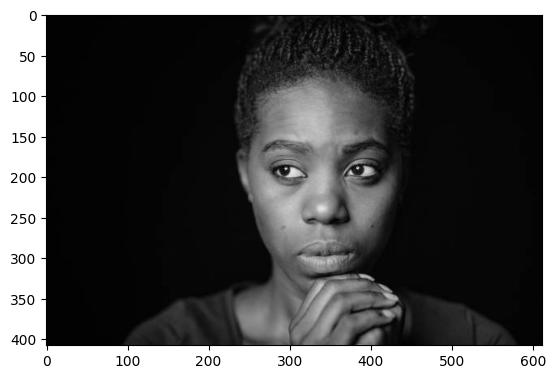

In [2]:
img = cv2.imread('test.jpg')
_, im_arr = cv2.imencode('.jpg', img) 
im_bytes = im_arr.tobytes()
im_b64 = base64.b64encode(im_bytes)
im_b64 = base64.b64decode(im_b64)
im = Image.open(io.BytesIO(im_b64))
im = np.array(im)
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(img_rgb)

In [3]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
faces = faceCascade.detectMultiScale(img_gray, 1.1, 4)
for (x, y, w, h) in faces:
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_rgb = img_rgb[y:y+h, x:x+w]
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_rgb[ey: ey+eh, ex:ex + ew]

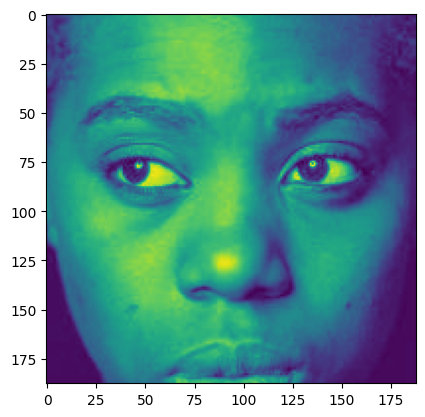

In [5]:
cropped_image = Image.fromarray(face_roi).convert('L')
cropped_image = np.array(cropped_image)
cropped_image.shape
plt.imshow(cropped_image)